In [2]:
import sys
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3dPU/3dPU/_3DLoops/")

In [56]:
from _3dpu import *
import matplotlib.pyplot as plt

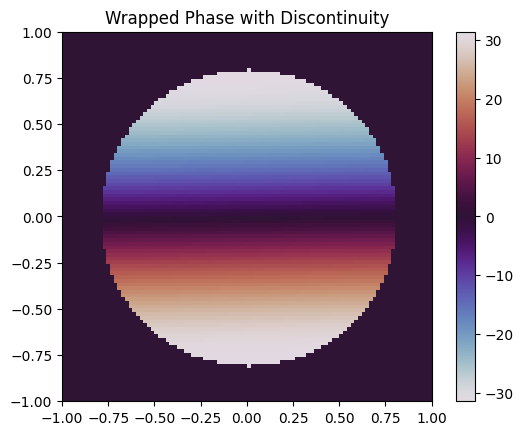

In [88]:
import numpy as np

# Parameters for the grid and the ball
grid_size = 100
radius = 40
center = [grid_size // 2, grid_size // 2, grid_size // 2]

# Create a 3D grid
x, y, z = np.ogrid[:grid_size, :grid_size, :grid_size]

# Equation for a sphere
mask = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2 <= radius**2

# Create varying phase data inside the ball
# For instance, a linear gradient from -10*pi to 10*pi across one dimension
phase_data = np.zeros((grid_size, grid_size, grid_size))
phase_data[mask] = np.linspace(-10 * np.pi, 10 * np.pi, np.count_nonzero(mask))

# Wrap the phase data
wrapped_phase_data = np.angle(np.exp(1j * phase_data))

# 'wrapped_phase_data' now contains wrapped phase values with visible variations

plt.imshow(phase_data[:, :, 50], cmap='twilight', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.title('Wrapped Phase with Discontinuity')
plt.show()

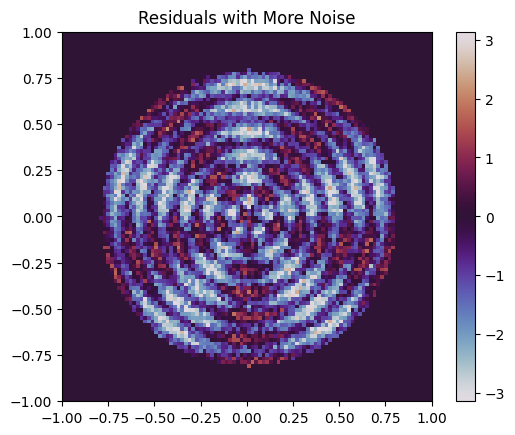

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the grid and the sphere
grid_size = 100
radius = 40
center = [grid_size // 2, grid_size // 2, grid_size // 2]

# Create a 3D grid
X, Y, Z = np.meshgrid(np.arange(grid_size), np.arange(grid_size), np.arange(grid_size), indexing='ij')

# Equation for a sphere
mask = (X - center[0])**2 + (Y - center[1])**2 + (Z - center[2])**2 <= radius**2

# Convert grid indices to radial and angular coordinates
r = np.sqrt((X - center[0])**2 + (Y - center[1])**2 + (Z - center[2])**2)
theta = np.arccos((Z - center[2]) / np.maximum(r, 1))  # Avoid division by zero for r = 0
phi = np.arctan2((Y - center[1]), (X - center[0]))

# Complex phase pattern using the recalculated coordinates
phase_data = np.zeros((grid_size, grid_size, grid_size))
phase_data[mask] = np.sin(3 * theta[mask]) + np.cos(5 * phi[mask]) + np.sin(r[mask])

# Increase the scale of the noise for more pronounced residuals
increased_noise = np.random.normal(scale=0.5, size=phase_data.shape)  # Increased noise scale
noisy_phase_data_with_more_noise = phase_data + increased_noise

# Ensure that the noise is only added within the sphere
noisy_phase_data_with_more_noise[~mask] = 0

# Wrap the noisy phase data with more noise
wrapped_noisy_phase_data_with_more_noise = np.angle(np.exp(1j * noisy_phase_data_with_more_noise))

# Calculate the residuals with more noise
residuals_with_more_noise = noisy_phase_data_with_more_noise - wrapped_noisy_phase_data_with_more_noise

# Visualize a slice of the residuals with more noise
plt.imshow(wrapped_noisy_phase_data_with_more_noise[:, :, center[2]], cmap='twilight', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.title('Residuals with More Noise')
plt.show()


In [118]:
(residuals(phase_data,0) == 0).all()

True

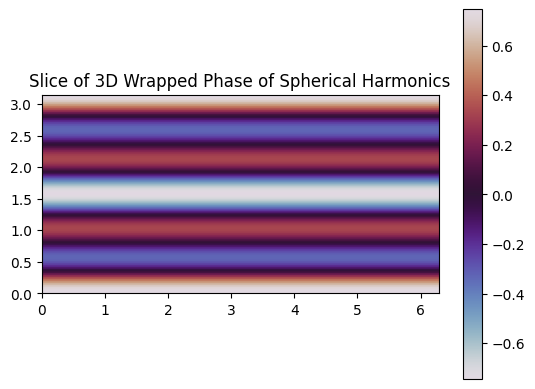

(100, 100, 100)


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Parameters for the 3D grid
grid_size = 100

# Create a 3D grid of spherical coordinates within a unit sphere
u = np.linspace(0, 2 * np.pi, grid_size)
v = np.linspace(0, np.pi, grid_size)
theta, phi, r = np.meshgrid(u, v, np.linspace(0, 1, grid_size), indexing='ij')

# Define degree and order for the spherical harmonic
degree = 3
order = 0  # Adjust the order as needed

# Calculate the real part of the spherical harmonics on the unit sphere
harmonic_values = sph_harm(order, degree, phi, theta).real

# Wrap the phase of the real part
wrapped_phase_data = np.angle(np.exp(1j * harmonic_values))

# Visualize a slice of the 3D wrapped phase data
slice_index = grid_size // 2  # Choose a slice index along one dimension
plt.imshow(wrapped_phase_data[:, :, slice_index], cmap='twilight', extent=[0, 2*np.pi, 0, np.pi])
plt.colorbar()
plt.title('Slice of 3D Wrapped Phase of Spherical Harmonics')
plt.show()

# The wrapped_phase_data now contains wrapped phase values based on spherical harmonics in 3D
print(wrapped_phase_data.shape)



In [86]:
(residuals(wrapped_phase_data,1) == 0).all()

True

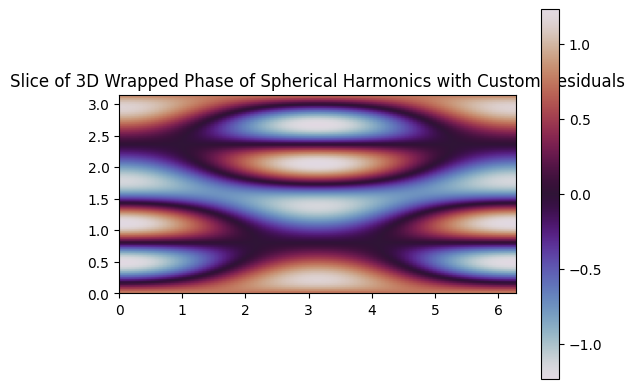

(100, 100, 100)


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

# Parameters for the 3D grid
grid_size = 100

# Create a 3D grid of spherical coordinates within a unit sphere
u = np.linspace(0, 2 * np.pi, grid_size)
v = np.linspace(0, np.pi, grid_size)
theta, phi, r = np.meshgrid(u, v, np.linspace(0, 1, grid_size), indexing='ij')

# Define degree and order for the spherical harmonic
degree = 3
order = 0  # Adjust the order as needed

# Calculate the real part of the spherical harmonics on the unit sphere
harmonic_values = sph_harm(order, degree, phi, theta).real

# Wrap the phase of the real part
wrapped_phase_data = np.angle(np.exp(1j * harmonic_values))

# Create custom residuals (variations) in the wrapped phase data
# You can define your own patterns or variations here
custom_residuals = np.sin(2 * theta) * np.cos(2 * phi)  # Example custom pattern

# Add the custom residuals to the wrapped phase data
wrapped_phase_data_with_custom_residuals = wrapped_phase_data + custom_residuals

# Visualize a slice of the 3D wrapped phase data with custom residuals
slice_index = grid_size // 2  # Choose a slice index along one dimension
plt.imshow(wrapped_phase_data_with_custom_residuals[:, :, slice_index], cmap='twilight', extent=[0, 2*np.pi, 0, np.pi])
plt.colorbar()
plt.title('Slice of 3D Wrapped Phase of Spherical Harmonics with Custom Residuals')
plt.show()

# The wrapped_phase_data_with_custom_residuals now includes custom residuals and is a 3D vector of size 100x100x100
print(wrapped_phase_data_with_custom_residuals.shape)

